In [11]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import plotly.express as px

# Understanding the data

In [12]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
fig = px.scatter(data, x='Hours', y='Scores',title='Hours vs Percentage')#trendline="ols"
fig.update_traces(marker_size=15)
fig.show()

In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [16]:
data.corr().style.background_gradient(cmap='Blues')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing the data

In [17]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Training Linear regression algorithm

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print('Training completed')

Training completed


Plotting the regression line


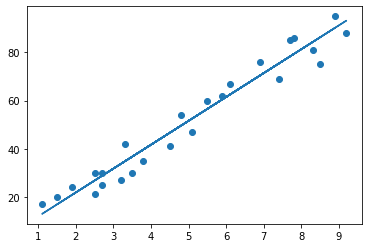

In [20]:
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [21]:
fig = px.scatter(X,y,trendline="ols")
fig.update_traces(marker_size=10)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Making prediction

In [22]:
print(x_test) # testing data in hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
y_pred=reg.predict(x_test) # predicting the score

In [24]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
hours = 9.25
my_pred = reg.predict(np.array([hours]).reshape(1, 1))
print(f'Studying {hours} predicted to get the score {my_pred[0]}')

Studying 9.25 predicted to get the score 93.69173248737539


In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [27]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
